# Testes de Normalidade

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

sns.set()
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('../dataset_limpo/survey_results_public_clean.csv', sep=',', encoding='utf-8')
df.head()

,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,GrossWage,WageFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessionalUse,OpSysPersonalUse,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,SOVisitFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,YearlyWageInDollar,YearsCodeNumber,YearsCodeProNumber
0,0,1,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2,dev,employed_full_time,remote,hobby;open_source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,canada,CAD,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,Very unfavorable,daily,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,3,part_dev,employed_full_time,hybrid,hobby,master,books;someone;other_online_resources,technical_documentation;blogs;programming_game...,NaN,14,5,data_scientist_or_machine_learning_specialist;...,20 to 99 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,multiple_day,25-34 years old,man,no,bisexual,white,none,emotional;anxiety,NaN,NaN,NaN,NaN,NaN,40205.0,14.0,5.0
3,3,4,dev,employed_full_time,remote,i_dont_code_outside_of_work,bachelor,books;school,NaN,NaN,20,17,developer_full_stack,100 to 499 employees,israel,ILS,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,Very unfavorable,daily,35-44 years old,man,no,heterosexual,white,none,none,NaN,NaN,NaN,NaN,NaN,215232.0,20.0,17.0
4,4,5,dev,employed_full_time,hybrid,hobby,bachelor,other_online_resources;job,technical_documentation;blogs;stack_overflow;o...,NaN,8,3,developer_front_end;developer_full_stack;devel...,20 to 99 employees,united_states_of_america,USD,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Cloud Firestore;Elasticsearch;Firebase Realtim...,Firebase;Microsoft Azure,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,Angular;ASP.NET Core ;Blazor;Node.js,.NET,.NET;Apache Kafka,npm,Docker;Kubernetes,Notepad++;Visual Studio;Visual Studio Code;Xcode,Rider;Visual Studio;Visual Studio Code,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,Unfavorable,multiple_day,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      73268 non-null  int64  
 1   ResponseId                      73268 non-null  int64  
 2   MainBranch                      73268 non-null  object 
 3   Employment                      71709 non-null  object 
 4   RemoteWork                      58958 non-null  object 
 5   CodingActivities                58899 non-null  object 
 6   EdLevel                         71571 non-null  object 
 7   LearnCode                       71580 non-null  object 
 8   LearnCodeOnline                 50685 non-null  object 
 9   LearnCodeCoursesCert            29389 non-null  object 
 10  YearsCode                       71331 non-null  object 
 11  YearsCodePro                    51833 non-null  object 
 12  DevType                         

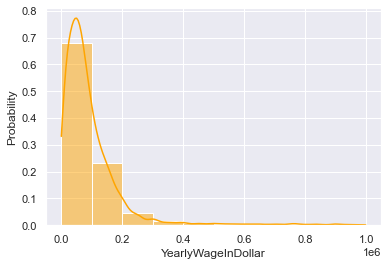

In [119]:
df_aux1 = df[df['YearsCodeProNumber'] > 0]
df_aux1 = df_aux1[df_aux1['YearlyWageInDollar'] < 1000000] # outliers. se nao fizer isso quebra tudo

sns.histplot(df_aux1, x='YearlyWageInDollar', bins=10, color="orange", kde=True, stat="probability");

# histograma

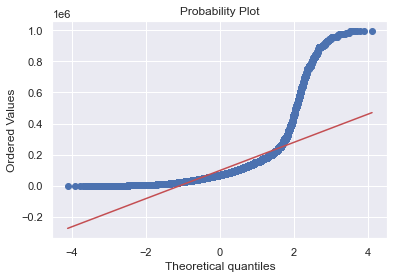

In [120]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df_aux1['YearlyWageInDollar'], dist="norm", plot=plt)
plt.show()

# qqplot

In [121]:
stats.shapiro(df_aux1.sample(5000).YearlyWageInDollar) # nota: com samples menores de 2000 começa a ter muita variação no p-value (a cada vez que rodamos o código), não sei o que isso significa. mas acima de 2000 sempre vai pra 0, e statistic tem uma variacao menor

ShapiroResult(statistic=0.6000556945800781, pvalue=0.0)

In [122]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(df_aux1.YearlyWageInDollar, dist = 'norm')

# não entendi como interpretar isso

(0.20018172363162284, 0.0009999999999998899)

In [142]:
# teste mann-whitney
# pelo que entendi quado os dados não são normais (ver acima) precisamos usar testes não paramétricos, no caso o slide dizia pra usar mann-whitney

# mas os valores estão estranhos, não entendi por que stat tá sempre tão alto e p sempre tão baixo... no caso aqui to tentando comparar salários entre países pra ver se há uma diferença grande entre as medianas...

stat, p = stats.mannwhitneyu(df_aux1[df_aux1['Country'] == 'brazil'].YearlyWageInDollar, df_aux1[df_aux1['Country'] == 'india'].YearlyWageInDollar, method='')
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 1512958.5
p-valor: 3.8206654029164494e-30


In [151]:
stat, p = stats.mannwhitneyu(df_aux1[df_aux1['Country'] == 'united_states_of_america'].YearlyWageInDollar, df_aux1[df_aux1['Country'] == 'canada'].YearlyWageInDollar)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 8114775.0
p-valor: 2.6026325080465607e-172


comparando com boxplots, a diferença visual maior corresponde com p-value mais baixo, não sei se isso é útil

In [163]:
px.box(df_aux1[df_aux1['Country'].isin(['brazil', 'india'])], x ='YearlyWageInDollar', y="Country")

In [164]:
px.box(df_aux1[df_aux1['Country'].isin(['united_states_of_america', 'canada'])], x ='YearlyWageInDollar', y="Country")